In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [43]:
df = pd.read_csv("titanic.csv")

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
fare_data = df.loc[df['Fare'].notnull(), 'Fare'].values

### Prezentacja rozkładu wysokości opłat za bilet

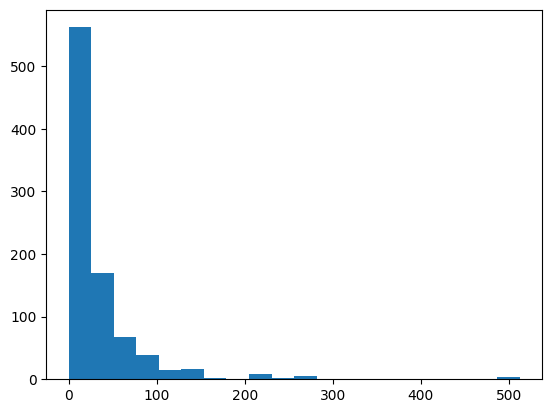

In [46]:
plt.hist(fare_data, bins=20)
plt.show()

### Obliczenie średniej opłaty

In [47]:
fare_mean = df['Fare'].mean().round(decimals=2)
fare_mean

32.2

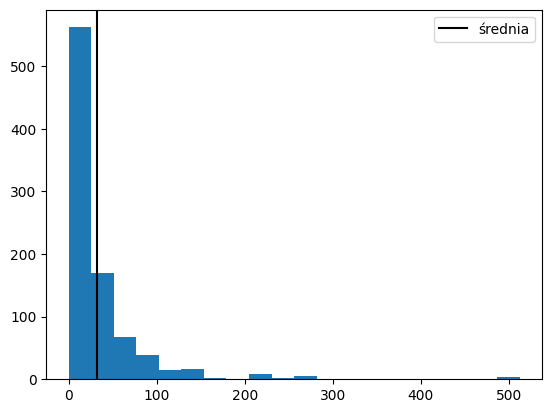

In [48]:
plt.hist(fare_data, bins=20)
plt.axvline(x=fare_mean, color='black', label="średnia")
plt.legend(loc='upper right')
plt.show()

### Obliczenie mediany

In [49]:
fare_median = df['Fare'].median().round(decimals=2)
fare_median

14.45

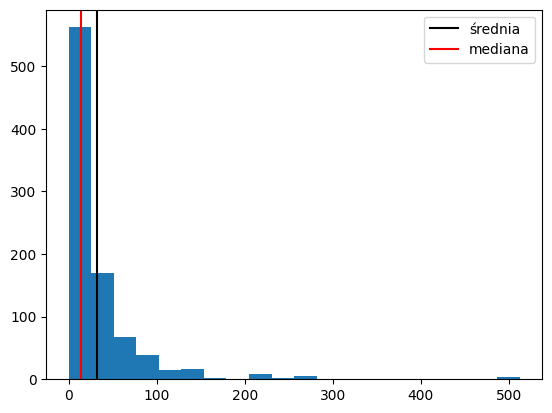

In [50]:
plt.hist(fare_data, bins=20)
plt.axvline(x=fare_mean, color='black', label="średnia")
plt.axvline(x=fare_median, color='red', label='mediana')
plt.legend(loc='upper right')
plt.show()

### Obliczenie mody

In [51]:
fare_mode = df['Fare'].mode(dropna=True)
fare_mode

0    8.05
Name: Fare, dtype: float64

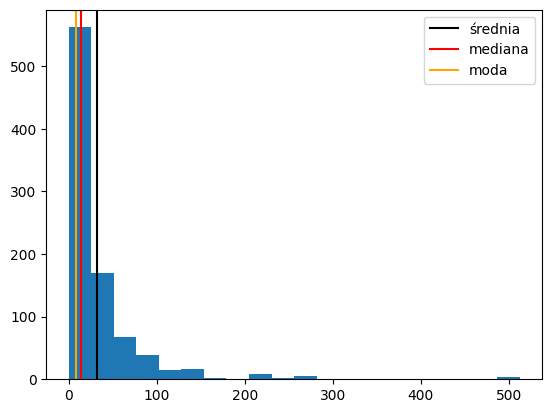

In [52]:
plt.hist(fare_data, bins=20)
plt.axvline(x=fare_mean, color='black', label="średnia")
plt.axvline(x=fare_median, color='red', label='mediana')
plt.axvline(x=fare_mode[0], color='orange', label='moda')
plt.legend(loc='upper right')
plt.show()

#### W przypadku danych dotyczących wysokości opłat za bilety mamy do czynienia z rozkładem pozytywnym skośnym

### Obliczenie kwartyli

In [55]:
q0 = df['Fare'].quantile(q=0.0).round(decimals=2)
q1 = df['Fare'].quantile(q=0.25).round(decimals=2)
q2 = df['Fare'].quantile(q=0.5).round(decimals=2)
q3 = df['Fare'].quantile(q=0.75).round(decimals=2)
q4 = df['Fare'].quantile(q=1).round(decimals=2)

#### Kwartyl 1

In [56]:
q1

7.91

#### Kwartyl 2

In [57]:
q2

14.45

#### Kwartyl 3

In [58]:
q3

31.0

#### Z powyższej analizy wynika, że 75% sprzedanych biletów nie przekraczało ceny 31.00 funtów

### Obliczenie zakresu danych

In [59]:
fare_range = q4 - q0
fare_range

512.33

### Obliczenie rozstępu międzykwartylowego

In [60]:
iqr = q3 - q1
iqr

23.09

### Wykres pudełkowy rozkładu cen biletów

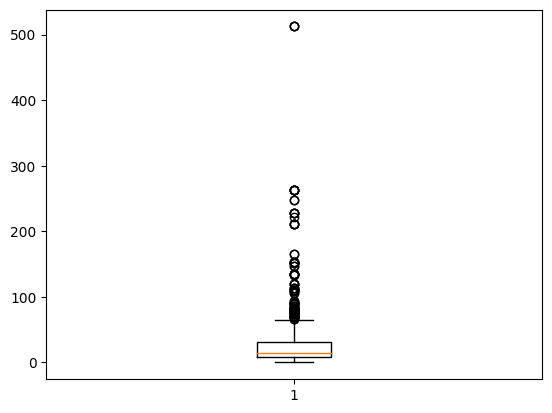

In [61]:
plt.boxplot(fare_data)
plt.show()

#### Z powyższej analizy wynika, że 75% biletów stanowiły bilety najtańsze i zwykłe natomiast pozostałe 25% stanowiły bilety klas premium

### Dane statystyczne z wykorzystaniem funkcji describe()

In [62]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64